# Sexism Types Keywords Mining

**Authors:** Álvaro D. Gómez Antón, Sabah Serhir Serhir, Elisa M. Ramos Monsoriu, Lautaro Paniati Altamirano, Estefania Solís Valverde, Alba Valverde Porcar

<br></br>

<div style="text-align: right"><i>Explaining Online Sexism: Language Models and a Mexican Perspective</i></div>
    
<div style="text-align: right">A Capstone Project by United Nations International Computing Centre (<a href="https://www.unicc.org/">UNICC</a>) and Universitat Politècnica de València (<a href="https://www.upv.es/es">UPV</a>) </div>

---

**Requirements**

In [1]:
!pip install wordcloud
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install git+https://github.com/LIAAD/yake

     ---------------------------------------- 12.9/12.9 MB 9.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
  Cloning https://github.com/LIAAD/yake to c:\users\lauta\appdata\local\temp\pip-req-build-uwbx9b6z
  Resolved https://github.com/LIAAD/yake to commit 374fc1c1c19eb080d5b6115cbb8d4a4324392e54
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake 'C:\Users\lauta\AppData\Local\Temp\pip-req-build-uwbx9b6z'


In [2]:
TRANSFORMED_DATA_PATH = "../data/transformed"

## The Data
Let's take a look at our database and how it is structured. We will also create `data_es` with those instances whose language is Spanish (of any style, whether Mexican or not).

In [3]:
import pandas as pd

data = pd.read_csv(f'{TRANSFORMED_DATA_PATH}/gold_data.tsv', delimiter='\t')
data_es = data.query("language != 'en'")
data_es

,original_id,text,sexist,type,language,dataset
0,0,"no sabía que ""random"" era una opción.",0,non-sexist,es-mx,callme
1,1,los dos últimos deberían haberse ido.,0,non-sexist,es-mx,callme
2,2,"""ladyboner"" merece mucho más crédito que ""dude...",0,non-sexist,es-mx,callme
3,3,"a partir de ahora se llamará ""sourpuss"".",0,non-sexist,es-mx,callme
4,4,tarah w sacrificó a varias mujeres para ganar ...,0,non-sexist,es-mx,callme
...,...,...,...,...,...,...
58757,1047687262455177217,"yo no puedo darte luz todos los días, pero si ...",0,non-sexist,es,metwo
58758,1064482731739045888,que bien! aunque digan que las mujeres no debe...,0,non-sexist,es,metwo
58759,1040584804536856577,y misoginia las pelotas no quiero que vengas a...,0,non-sexist,es,metwo
58760,1051458429280235520,"""imaginen el tipo de sociedad mojigata y castr...",0,non-sexist,es,metwo


### Further Cleaning
This code performs several text preprocessing tasks using the NLTK library in Python.  
It imports re for regular expressions, string for string manipulation, nltk for natural language processing tasks, and specifically downloads the punkt tokenizer and stopwords corpus from NLTK.  
These functions are defined to perform specific preprocessing steps on text data:

- remove_punctuation: It removes punctuation marks from the text using regular expressions.
- remove_numbers: It removes numbers from the text using regular expressions.
- remove_stopwords: It removes stopwords from the text based on the specified language using NLTK's stopwords corpus.
- deepclean: It applies a series of preprocessing steps to the input text data. It converts the text to lowercase, tokenizes it, removes punctuation and numbers, removes stopwords, and replaces multiple whitespaces with a single space.

Overall, the deepclean function takes a series of texts as input and performs the defined preprocessing steps on each text.

In [4]:
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


import re
import string
import nltk
from nltk.corpus import stopwords


def remove_punctuation(text):
    """
    Removes punctuation marks from the text.
    
    Parameters:
    - text: Input text
    
    Returns:
    - Text with punctuation removed
    """
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)


def remove_numbers(text):
    """
    Removes numbers from the text.
    
    Parameters:
    - text: Input text
    
    Returns:
    - Text with numbers removed
    """
    return re.sub(r"\d+", "", text)


def remove_stopwords(text, lang):
    """
    Removes stopwords from the text based on the specified language.
    
    Parameters:
    - text: Input text
    - lang: Language code
    
    Returns:
    - Text with stopwords removed
    """
    return re.sub(fr'\b(?:{"|".join(stopwords.words(lang))})\b', "", text)


def deepclean(texts, lang):
    """
    Applies a series of text cleaning steps to the input texts.
    
    Parameters:
    - texts: Series of texts to clean
    - lang: Language code
    
    Returns:
    - Cleaned texts
    """
    return texts.apply(lambda x: " ".join(nltk.word_tokenize(x.lower(), language=lang))) \
                .apply(remove_punctuation) \
                .apply(remove_numbers) \
                .apply(remove_stopwords, lang=lang) \
                .apply(lambda x: re.sub("\s+", " ", x))



data_es["text"] = deepclean(data_es.text, lang="spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lauta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lauta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\lauta\AppData\Local\Temp\ipykernel_9808\1207846797.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_es.loc[:,"text"] = deepclean(data_es.text, lang="spanish")


In [19]:
data_es

,original_id,text,sexist,type,language,dataset
0,0,sabía random opción,0,non-sexist,es-mx,callme
1,1,dos últimos deberían haberse ido,0,non-sexist,es-mx,callme
2,2,ladyboner merece crédito dudeboner,0,non-sexist,es-mx,callme
3,3,partir ahora llamará sourpuss,0,non-sexist,es-mx,callme
4,4,tarah w sacrificó varias mujeres ganar apoyo w...,0,non-sexist,es-mx,callme
...,...,...,...,...,...,...
58757,1047687262455177217,puedo darte luz días si querés acompaño días ...,0,non-sexist,es,metwo
58758,1064482731739045888,bien aunque digan mujeres deberían ser tema a...,0,non-sexist,es,metwo
58759,1040584804536856577,misoginia pelotas quiero vengas marcha si ace...,0,non-sexist,es,metwo
58760,1051458429280235520,imaginen tipo sociedad mojigata castradora es...,0,non-sexist,es,metwo


### Visualization

We use wordclouds to visualize the most frequent words, both overall and within each type of sexism. Wordclouds provide a quick overview of the prominent words in a text or a specific category. By examining these wordclouds, we gain insights into the words that align with our keywords and how they fit within the definition of each type of sexism.  

We create the `wordcloud` function to generate and display the word clouds. This function takes a collection of text data as input and utilizes the "wordcloud" library to generate a visual representation of the most frequent words. 

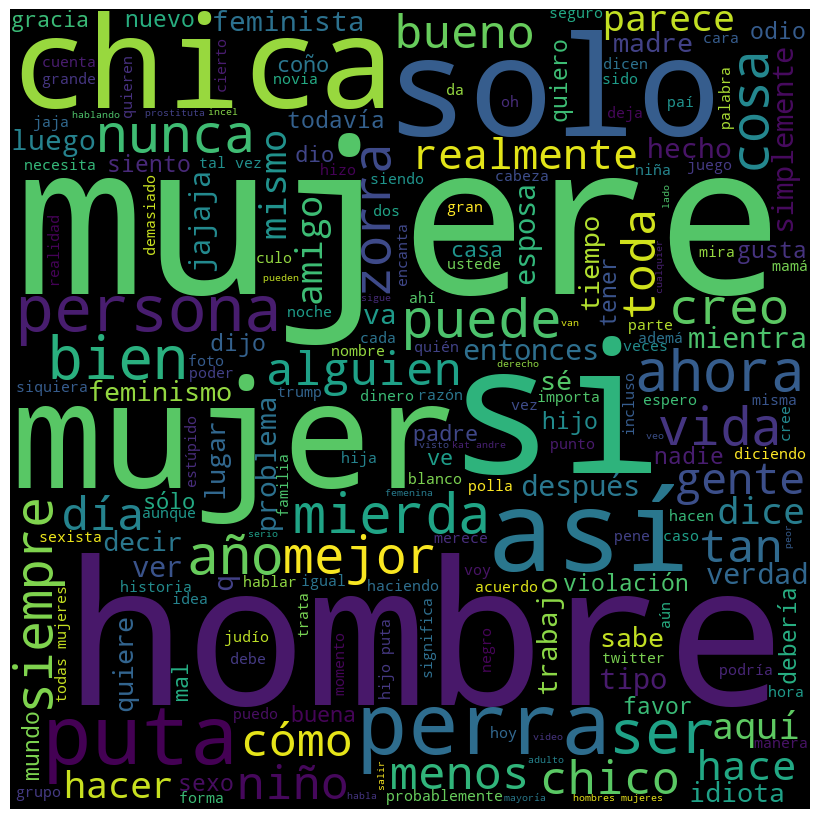

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(text):
    """
    Generates and displays a word cloud visualization for the input text.
    
    Parameters:
    - text: Input text
    
    Returns:
    - None (displays the word cloud plot)
    """
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

wordcloud(' '.join(data_es['text']))


Abuse



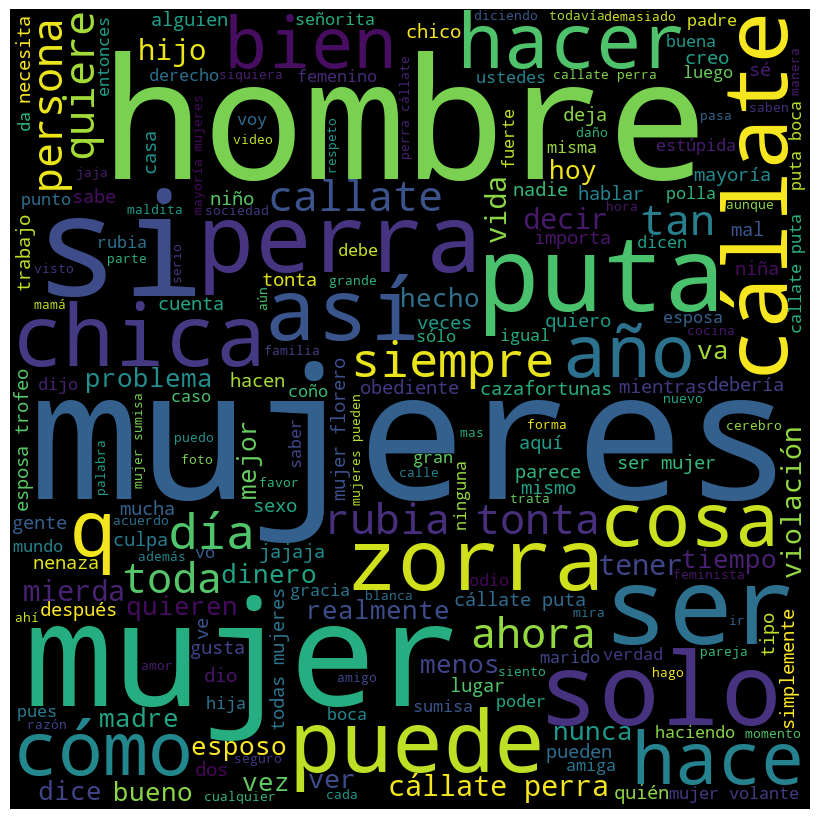


Hate



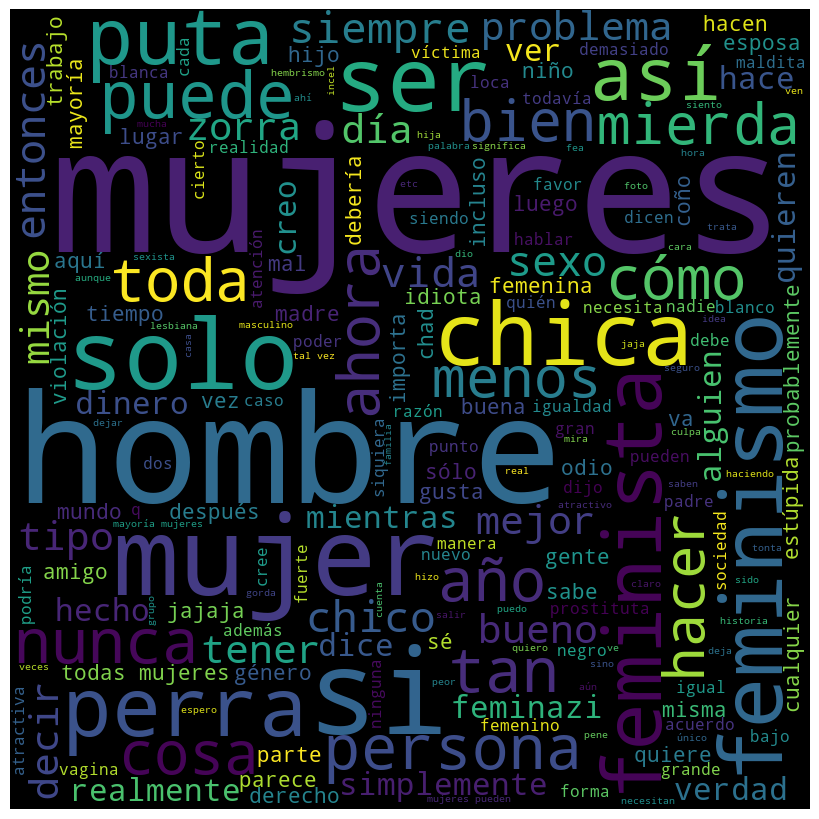


Profanities



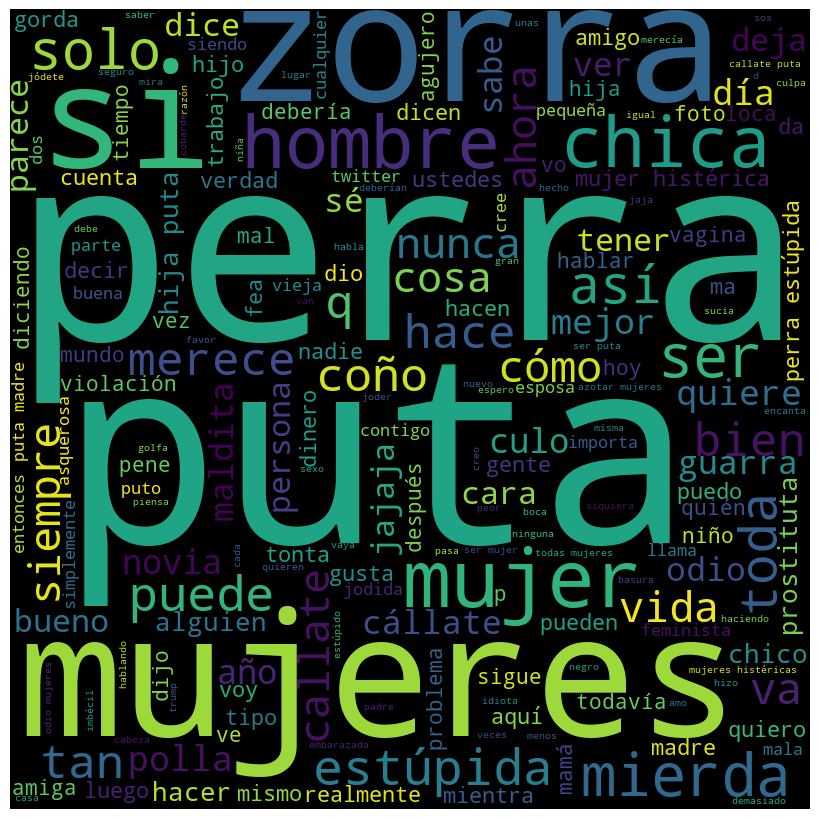


Violent



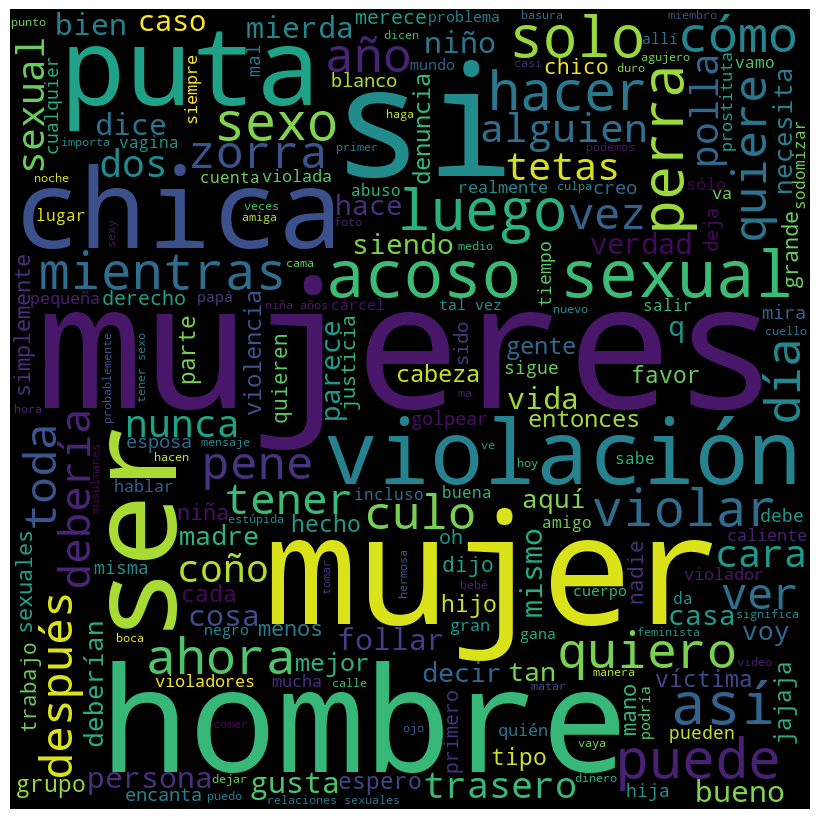


Sexually explicit



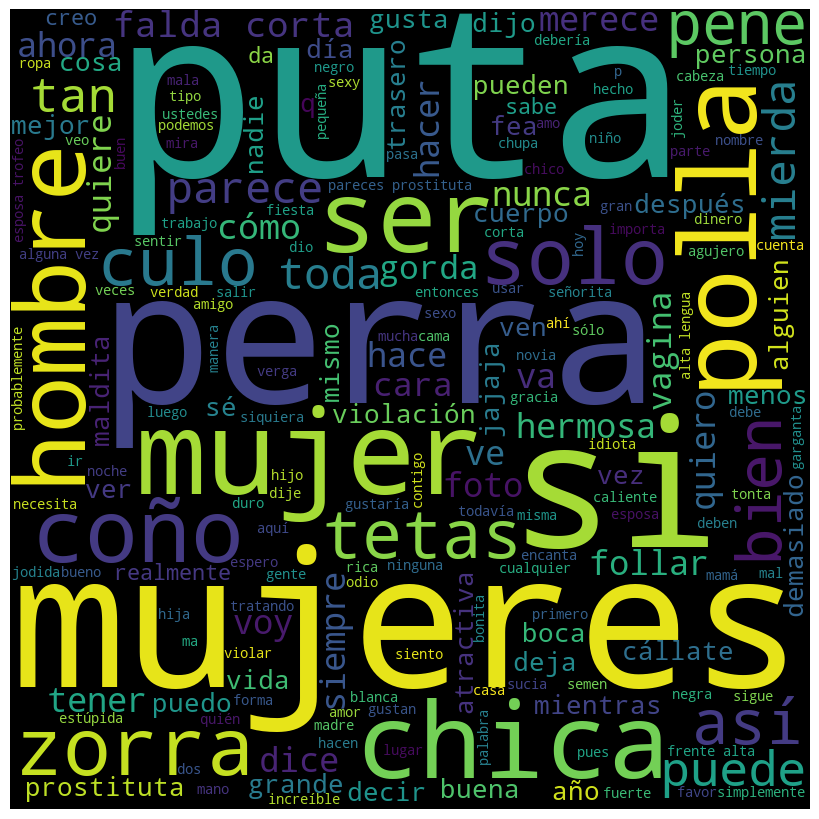

In [31]:
print('\nAbuse\n')
wordcloud(' '.join(data_es[data_es['type'] == 'abuse']['text']))
print('\nHate\n')
wordcloud(' '.join(data_es[data_es['type'] == 'hate']['text']))
print('\nProfanities\n')
wordcloud(' '.join(data_es[data_es['type'] == 'profanities']['text']))
print('\nViolent\n')
wordcloud(' '.join(data_es[data_es['type'] == 'violent']['text']))
print('\nSexually explicit\n')
wordcloud(' '.join(data_es[data_es['type'] == 'sexually-explicit']['text']))

## Keyword Minning
We create first, an auxiliary function: `prune_keywords`. Here's a brief explanation of what it does:

takes a dictionary of keywords (`keywords`) and a pruning mode (`mode`). It performs the following steps:

- Creates a deep copy of the input `keywords` dictionary.
- Based on the specified `mode`, it selects and prunes the keywords.
    - If `mode` is "transversal", it selects words that appear in all the lists of keywords and stores them as candidates.
    - If `mode` is "repeated", it selects words that appear more than once in the lists of keywords and stores them as candidates.
- It creates a new dictionary (`_keywords`) and prunes the keywords for each sexism category by removing the candidates.
- The pruned keywords are stored in `_keywords`, and the candidates are stored under the key "candidates" in the `_keywords` dictionary.
- The resulting pruned keywords dictionary (`_keywords`) is returned.

These functions are designed to facilitate keyword extraction (`mine`) and keyword pruning (`prune_keywords`) from a given DataFrame, providing flexibility in selecting different algorithms and pruning modes to analyze and process the extracted keywords effectively.

In [75]:
import collections
from collections import defaultdict
from copy import deepcopy

def prune(keywords, mode="transversal"):
    """
    Prunes the extracted keywords based on the specified mode.
    
    Args:
        keywords (dict): Dictionary of extracted keywords for each category.
        mode (str, optional): Pruning mode. Must be one of: 'transversal' or 'repeated'.
        
    Returns:
        dict: Dictionary containing the pruned keywords for each category and the candidate keywords.
    """
    
    # Select candidates
    if mode == "transversal":
        # Select words that appear in ALL the lists of keywords
        candidates = set(list(keywords.values())[0])
        for sexism_type, keyw in keywords.items():
            candidates = candidates.intersection(set(keyw))
        candidates = list(candidates)
    
    elif mode == "repeated":
        # Select words repeated (appeared > 1) from the lists of keywords
        candidates = []
        aux = collections.defaultdict(int)
        for sexism_type, keyw in keywords.items():
            for word in keyw:
                aux[word] += 1
                if aux[word] > 1:
                    candidates.append(word)
    
    _keywords = {}
    
    # Prune candidates
    for sexism_type, keyw in keywords.items():
        _keywords[sexism_type] = [word for word in keyw if word not in candidates]
    
    # Save candidates
    _keywords["candidates"] = candidates
    
    return _keywords

### Tf-Idf

TF-IDF is a technique that helps determine the relative importance of words in a document by considering their frequency within the document and across a collection of documents. It serves as a powerful tool for keyword extraction, text summarization, and other information retrieval tasks. We want to use this idea to get our keywords.

So now we create `get_keywords_tfidf` and `mine_tfidf`. Here's a brief explanation of what each function does:

1. `get_keywords_tfidf` function:
This function takes a list of texts (`texts`) and a parameter for the number of top keywords to extract (`top`). It performs the following steps:

- Creates an instance of the `TfidfVectorizer` class from the scikit-learn library. This vectorizer is used to generate the TF-IDF matrix.
- Fits the vectorizer on the input texts and transforms the texts into a TF-IDF matrix.
- Calculates the importance of each word based on its TF-IDF value in the matrix.
- Sorts the word importance list in descending order based on the TF-IDF scores.
- Returns the top `top` words with the highest TF-IDF scores as the extracted keywords.

2. `mine_tfidf` function:
This function takes a DataFrame (`df`) and the number of top keywords to extract (`n`). It performs the following steps:

- For each unique value of `df.type` (sexism category), it applies the `get_keywords_tfidf` function to the text data from the DataFrame (`df.loc[df.type == sexism, "text"]`) and extracts the top `n` TF-IDF-based keywords.
- The extracted keywords for each sexism category are stored in a dictionary, where the category serves as the key and the extracted keywords as the value.
- The resulting dictionary is returned.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_keywords_tfidf(texts: list, top: int):
    """
    Extracts the top keywords from a list of texts using TF-IDF.
    
    Args:
        texts (list): List of texts.
        top (int): Number of top keywords to extract.
        
    Returns:
        list: List of top keywords.
    """
    # Create a TfidfVectorizer object to generate the TF-IDF matrix
    vectorizer = TfidfVectorizer(lowercase=True)
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Get the list of words in order of importance based on their TF-IDF score
    word_importance = [(word, tfidf_matrix.getcol(idx).sum())
                       for word, idx in vectorizer.vocabulary_.items()]
    word_importance = sorted(word_importance, key=lambda x: -x[1])

    # Return the 'top' most important words
    return [word for word, score in word_importance[:top]]

def mine_tfidf(df, n):
    return { 
        sexism: get_keywords_tfidf(texts=df.loc[df.type == sexism, "text"], top=n) 
        for sexism in df.type.unique()
    }

In [72]:
tfidf_keywords = mine_tfidf(data_es, n=15)
#tfidf_keywords = mine(data_es, n=15, algorithm="tf-idf")
for sexism_type, keyw in tfidf_keywords.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: mujeres, si, mujer, ser, hombres, solo, hombre, puta, chica, así, tan, chicas, bien, cómo, tener
• hate: mujeres, hombres, si, mujer, ser, solo, feminismo, perra, hombre, así, puta, todas, feministas, chicas, tener
• violent: mujeres, mujer, si, sexual, ser, acoso, violación, hombres, puta, follar, hombre, años, solo, sexo, perra
• abuse: perra, mujeres, cállate, mujer, puta, callate, si, hombres, ser, tonta, zorra, hombre, rubia, así, solo
• sexually-explicit: puta, perra, mujeres, polla, si, mujer, tetas, culo, ser, zorra, coño, chica, corta, falda, solo
• profanities: puta, perra, zorra, mujeres, mujer, si, estúpida, ser, mierda, cállate, chica, callate, putas, solo, hombres


In [73]:
pruned = prune_keywords(tfidf_keywords)
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: hombres, hombre, chica, así, tan, chicas, bien, cómo, tener
• hate: hombres, feminismo, perra, hombre, así, todas, feministas, chicas, tener
• violent: sexual, acoso, violación, hombres, follar, hombre, años, sexo, perra
• abuse: perra, cállate, callate, hombres, tonta, zorra, hombre, rubia, así
• sexually-explicit: perra, polla, tetas, culo, zorra, coño, chica, corta, falda
• profanities: perra, zorra, estúpida, mierda, cállate, chica, callate, putas, hombres
• candidates: solo, ser, si, puta, mujeres, mujer


In [76]:
pruned = prune_keywords(tfidf_keywords, mode="repeated")
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: tan, bien, cómo
• hate: feminismo, todas, feministas
• violent: sexual, acoso, violación, follar, años, sexo
• abuse: tonta, rubia
• sexually-explicit: polla, tetas, culo, coño, corta, falda
• profanities: estúpida, mierda, putas
• candidates: mujeres, hombres, si, mujer, ser, solo, hombre, así, puta, chicas, tener, mujeres, mujer, si, ser, hombres, puta, hombre, solo, perra, perra, mujeres, mujer, puta, si, hombres, ser, hombre, así, solo, puta, perra, mujeres, si, mujer, ser, zorra, chica, solo, puta, perra, zorra, mujeres, mujer, si, ser, cállate, chica, callate, solo, hombres


### Spacy

SpaCy is a powerful and efficient NLP library that combines state-of-the-art models, linguistic annotations, and high-performance processing capabilities. It simplifies complex NLP tasks and enables developers to process and analyze text effectively, making it a valuable tool in the field of natural language processing.  

To use it for the keyword extraction we create three functions: `get_keywords_count`, `get_keywords_spacy`, and `mine_keywords_spacy`. Here's a brief explanation of what each function does:

1. `get_keywords_count` function:
This function takes a list of texts (`texts`) and a parameter for the number of top keywords to extract (`top`). It performs the following steps:

- Creates a `Counter` object, which counts the occurrences of each word in the texts.
- Removes the empty string ("''") from the counter, if present.
- Returns the top `top` most common words based on their frequency.

2. `get_keywords_spacy` function:
This function takes a list of texts (`texts`), a parameter for the number of top keywords to extract (`top`), and a SpaCy language model (`spacy_background`). It performs the following steps:

- Applies the SpaCy language model to each text in `texts` using `texts.apply(spacy_background)`, which processes the texts and returns SpaCy `Doc` objects.
- Extracts the lemmatized form of each noun and adjective token from the processed texts and filters out other parts of speech.
- Calls the `get_keywords_count` function with the lemmatized tokens to obtain the top `top` most common keywords.
- Returns the extracted keywords.

3. `mine_keywords_spacy` function:
This function takes a DataFrame (`df`) and an optional parameter for the number of top keywords to extract (`n`). It performs the following steps:

- Loads the SpaCy language model for Spanish (`es_core_news_sm`) using `spacy.load`.
- For each unique value of `df.type` (sexism category), it applies the `get_keywords_spacy` function to the text data from the DataFrame (`df.loc[df.type == sexism, "text"]`) with the specified number of top keywords (`n`) and the loaded SpaCy language model (`nlp`).
- The extracted keywords for each sexism category are stored in a dictionary, where the category serves as the key and the extracted keywords as the value.
- The resulting dictionary is returned.


In [39]:
from collections import Counter
from copy import deepcopy
import spacy

def get_keywords_counts(texts: list, top: int):
    """
    Extracts the top keywords from a list of texts based on their frequency counts.
    
    Args:
        texts (list): List of texts.
        top (int): Number of top keywords to extract.
        
    Returns:
        list: List of top keywords.
    """
    counter = Counter(texts)
    del counter["''"]
    return [word for word, count in counter.most_common(top)]


def get_keywords_spacy(texts: pd.Series, top: int, spacy_background, sintaxis: list):
    """
    Extracts the top keywords from a Pandas Series of texts using Spacy and syntactic categories.
    
    Args:
        texts (pd.Series): Pandas Series of texts.
        top (int): Number of top keywords to extract.
        spacy_background: Pre-initialized Spacy model.
        sintaxis (list): List of syntactic categories to consider.
        
    Returns:
        list: List of top keywords.
    """
    return get_keywords_counts([
        token.lemma_ for doc in texts.apply(spacy_background)
        for token in doc if token.pos_ in sintaxis
    ], top=top)

def mine_keywords_spacy(df, n=15):
    nlp = spacy.load('es_core_news_sm')
    return { 
        sexism: get_keywords_spacy(df.loc[df.type == sexism, "text"], n, nlp) 
        for sexism in df.type.unique()
    }

In [40]:
spacy_keywords = mine_keywords_spacy(data_es, 15)
#spacy_keywords = mine(data_es, n=15, algorithm="spacy", spacy_sintaxis=["ADJ", "NOUN"])
print("Sexism Keywords")
for sexism_type, keyw in spacy_keywords.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

Sexism Keywords
• non-sexist: mujer, hombre, chica, persona, vez, puta, chico, año, solo, día, cosa, hijo, buen, blanco, gente
• hate: mujer, hombre, feminismo, feminista, chica, solo, puta, vez, chico, perra, cosa, año, persona, blanco, femenino
• violent: mujer, hombre, sexual, violación, acoso, año, puta, vez, sexo, chica, día, solo, chico, culo, blanco
• abuse: mujer, hombre, puta, cállate, perra, vez, solo, callate, rubio, cosa, día, año, tonto, chico, chica
• sexually-explicit: mujer, puta, perra, hombre, polla, chica, culo, coño, teta, vez, zorra, parez, chico, hermoso, corto
• profanities: mujer, puta, perra, zorra, hombre, estúpido, puto, chica, chico, vez, cállate, mierdo, solo, callate, maldito


In [77]:
pruned = prune_keywords(spacy_keywords)
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: persona, año, solo, día, cosa, hijo, buen, blanco, gente
• hate: feminismo, feminista, solo, perra, cosa, año, persona, blanco, femenino
• violent: sexual, violación, acoso, año, sexo, día, solo, culo, blanco
• abuse: cállate, perra, solo, callate, rubio, cosa, día, año, tonto
• sexually-explicit: perra, polla, culo, coño, teta, zorra, parez, hermoso, corto
• profanities: perra, zorra, estúpido, puto, cállate, mierdo, solo, callate, maldito
• candidates: puta, chica, hombre, vez, mujer, chico


In [78]:
pruned = prune_keywords(spacy_keywords, mode="repeated")
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: hijo, buen, gente
• hate: feminismo, feminista, femenino
• violent: sexual, violación, acoso, sexo
• abuse: rubio, tonto
• sexually-explicit: polla, coño, teta, parez, hermoso, corto
• profanities: estúpido, puto, mierdo, maldito
• candidates: mujer, hombre, chica, solo, puta, vez, chico, cosa, año, persona, blanco, mujer, hombre, año, puta, vez, chica, día, solo, chico, blanco, mujer, hombre, puta, perra, vez, solo, cosa, día, año, chico, chica, mujer, puta, perra, hombre, chica, culo, vez, chico, mujer, puta, perra, zorra, hombre, chica, chico, vez, cállate, solo, callate


### Unsupervised Learning: Yake!
YAKE (Yet Another Keyword Extractor) is a Python library that provides a simple yet effective approach for automatic keyword extraction from text documents. Its goal is to identify the most relevant and informative keywords in a given document or collection of documents.

The core idea behind YAKE is to leverage statistical properties of words, such as their frequency and distribution, to determine their importance as keywords. YAKE considers both the term frequency within a document and the document frequency across the entire collection. By analyzing these factors, YAKE is able to identify keywords that are both highly representative of a specific document and distinct from the rest of the collection.

YAKE utilizes a scoring mechanism to assign importance scores to candidate keywords. These scores are based on statistical characteristics, linguistic patterns, and contextual information. The top-scoring keywords are then selected as the most relevant and informative ones.

One advantage of YAKE is its language independence. It can be applied to text documents in various languages by specifying the appropriate language code during keyword extraction.  

So we create two functions: `get_keywords_yake` and `mine_yake`. Here's a brief explanation of what each function does:

1. `get_keywords_yake` function:
This function takes a list of texts (`texts`), a parameter for the number of top keywords to extract (`top`), and a language code (`lang`). It performs the following steps:

- Creates a `KeywordExtractor` object from the YAKE library, specifying the language (`lan`) and the number of top keywords to extract (`top`).
- Extracts keywords from the input texts using the `extract_keywords` method of the `KeywordExtractor`.
- Returns the extracted keywords, taking only the first element of each keyword tuple.

2. `mine_yake` function:
This function takes a DataFrame (`df`), a parameter for the number of top keywords to extract (`n`), and an optional language code (`lang`). It performs the following steps:

- For each unique value of `df.type` (sexism category), it concatenates the text data from the DataFrame for that specific category (`df[df.type == sexism]["text"]`) into a single string using `''.join()`.
- Calls the `get_keywords_yake` function with the concatenated text, the number of top keywords (`n`), and the specified language code (`lang`) to extract keywords using the YAKE library.
- The extracted keywords for each sexism category are stored in a dictionary, where the category serves as the key and the extracted keywords as the value.
- The resulting dictionary is returned.

In [68]:
import yake

def get_keywords_yake(texts: list, top: int, lang: str):
    """
    Extracts the top keywords from a text using YAKE (Yet Another Keyword Extractor).
    
    Args:
        texts: Text to extract keywords from.
        top: Number of top keywords to extract.
        lang: Language code.
        
    Returns:
        list: List of top keywords.
    """
    kw_extractor = yake.KeywordExtractor(lan=lang, top=top)
    return kw_extractor.extract_keywords(texts)

def mine_yake(df, n, lang=None):
    return { 
        sexism: get_keywords_yake(texts=''.join(df[df.type == sexism]["text"]), 
                                           top=n, lang=lang) 
        for sexism in df.type.unique()
    }

In [89]:
yake_keywords = mine_yake(data_es, n=15, lang="es-mx")
#yake_keywords = mine(data_es, n=15, algorithm="yake", yake_lang="es-mx")
pruned = prune_keywords(yake_keywords)
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: hombre, chicas, personas, años, realmente, mierda, alguien, día, vida, persona
• hate: hombre, feminismo, perra, chicas, feministas, años, sexo, vida, mierda, personas
• violent: sexual, acoso, años, violación, hombre, sexo, follar, quiero, violar, perra
• abuse: perra, hombre, cállate, tonta, zorra, rubia, callate, día, esposa, años
• sexually-explicit: perra, polla, coño, culo, falda, zorra, tetas, corta, pene, prostituta
• profanities: perra, zorra, putas, mierda, estúpida, perras, hombre, zorras, chicas, hija
• candidates: puta, chica, mujeres, hombres, mujer


In [80]:
pruned = prune_keywords(yake_keywords, mode = "repeated")
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• non-sexist: realmente, alguien, persona
• hate: feminismo, feministas
• violent: sexual, acoso, violación, follar, quiero, violar
• abuse: cállate, tonta, rubia, callate, esposa
• sexually-explicit: polla, coño, culo, falda, tetas, corta, pene, prostituta
• profanities: putas, estúpida, perras, zorras, hija
• candidates: mujeres, hombres, mujer, hombre, chicas, puta, chica, años, vida, mierda, personas, mujeres, mujer, hombres, años, hombre, puta, sexo, chica, perra, mujeres, mujer, hombres, puta, perra, hombre, día, años, chica, mujeres, puta, perra, mujer, chica, zorra, hombres, puta, perra, mujeres, mujer, zorra, chica, mierda, hombres, hombre, chicas


## Final Selection
After careful consideration, we have decided to keep the final set of keywords generated by YAKE. We found that YAKE accurately identifies keywords by utilizing its scoring mechanism, providing us with highly accurate lists. These keywords capture the essence of the text and are valuable for our analysis.

However, we will not discard the information obtained from other methods. While YAKE's keywords are reliable, we recognize the importance of incorporating additional keywords that may not have been captured by automated methods alone. Therefore, we will manually supplement the keyword list with some carefully selected terms.

In [90]:
final_keywords = yake_keywords

del final_keywords["non-sexist"]

pruned = prune_keywords(final_keywords)
for sexism_type, keyw in pruned.items():
    print(f"{chr(8226)} \033[1m{sexism_type}\033[0m: {', '.join(keyw)}")

• hate: hombre, feminismo, chicas, feministas, años, sexo, vida, mierda, personas
• violent: sexual, acoso, años, violación, hombre, sexo, follar, quiero, violar
• abuse: hombre, cállate, tonta, zorra, rubia, callate, día, esposa, años
• sexually-explicit: polla, coño, culo, falda, zorra, tetas, corta, pene, prostituta
• profanities: zorra, putas, mierda, estúpida, perras, hombre, zorras, chicas, hija
• candidates: perra, puta, chica, mujeres, hombres, mujer


### Un Update: Subject Matter Experts Recommendations

In addition to manually adding keywords, we will also include a set of keywords proposed by domain experts who specialize in the subject matter and are familiar with the specific language style used in Mexico. Their expertise will contribute valuable insights and ensure that our keyword list encompasses relevant terms.

By combining the precision of YAKE's scoring-based keywords with manually added terms from various sources, including expert recommendations and domain-specific knowledge, we aim to create a comprehensive and accurate set of keywords for our analysis.

In [91]:
to_add = {
    'hate': ['hembrismo', 'hembras', 'daño', 'feminazi', 'equidad', 'género', 'mayoría'],
    'violent':['acosador', 'violador', 'acusado', 'coger', 'chingar', 'niña', 'sexualmente'],
    'abuse': ['volante', 'sumisa', 'fea', 'loca', 'inestable', 'emocional', 'objeto', 'gata', 'cosa'],
    'sexually-explicit': ['chichis', 'bolas', 'pito', 'verga', 'falda', 'corta', 'cola', 'concha', 'pucha', 'chupar', 'panocha', 'trasero', 'foto'],
    'profanities':['mereces', 'guarra', 'novia', 'madre', 'piruja', 'amiga', 'histérica', 'marrana']
}

print("Final keywords:")
for sexism, keyw in to_add.items():
    final_keywords[sexism].extend(to_add[sexism])
    print(f"{chr(8226)} \033[1m{sexism}\033[0m: {', '.join(keyw)}")

Final keywords:
• hate: hembrismo, hembras, daño, feminazi, equidad, género, mayoría
• violent: acosador, violador, acusado, coger, chingar, niña, sexualmente
• abuse: volante, sumisa, fea, loca, inestable, emocional, objeto, gata, cosa
• sexually-explicit: chichis, bolas, pito, verga, falda, corta, cola, concha, pucha, chupar, panocha, trasero, foto
• profanities: mereces, guarra, novia, madre, piruja, amiga, histérica, marrana


In [92]:
final_keywords_pruned1 = prune_keywords(final_keywords, mode="transversal")
print("\nKeywords without transversal")
for sexism, keyw in final_keywords_pruned.items():
    print(f"{chr(8226)} \033[1m{sexism}\033[0m: {', '.join(keyw)}")


Keywords without transversal
• hate: hombre, feminismo, chicas, feministas, años, sexo, vida, mierda, personas, hembrismo, hembras, daño, feminazi, equidad, género, mayoría
• violent: sexual, acoso, años, violación, hombre, sexo, follar, quiero, violar, acosador, violador, acusado, coger, chingar, niña, sexualmente
• abuse: hombre, cállate, tonta, zorra, rubia, callate, día, esposa, años, volante, sumisa, fea, loca, inestable, emocional, objeto, gata, cosa
• sexually-explicit: polla, coño, culo, falda, zorra, tetas, corta, pene, prostituta, chichis, bolas, pito, verga, falda, corta, cola, concha, pucha, chupar, panocha, trasero, foto
• profanities: zorra, putas, mierda, estúpida, perras, hombre, zorras, chicas, hija, mereces, guarra, novia, madre, piruja, amiga, histérica, marrana
• candidates: perra, puta, chica, mujeres, hombres, mujer


In [93]:
final_keywords_pruned2 = prune_keywords(final_keywords, mode="repeated")
print("\nKeywords without repeatings")
for sexism, keyw in final_keywords_pruned.items():
    print(f"{chr(8226)} \033[1m{sexism}\033[0m: {', '.join(keyw)}")


Keywords without repeatings
• hate: feminismo, feministas, vida, personas, hembrismo, hembras, daño, feminazi, equidad, género, mayoría
• violent: sexual, acoso, violación, follar, quiero, violar, acosador, violador, acusado, coger, chingar, niña, sexualmente
• abuse: cállate, tonta, rubia, callate, día, esposa, volante, sumisa, fea, loca, inestable, emocional, objeto, gata, cosa
• sexually-explicit: polla, coño, culo, tetas, pene, prostituta, chichis, bolas, pito, verga, cola, concha, pucha, chupar, panocha, trasero, foto
• profanities: putas, estúpida, perras, zorras, hija, mereces, guarra, novia, madre, piruja, amiga, histérica, marrana
• candidates: mujeres, mujer, hombres, años, hombre, puta, sexo, chica, perra, mujeres, mujer, hombres, puta, perra, hombre, años, chica, mujeres, puta, perra, mujer, chica, zorra, hombres, falda, corta, puta, perra, mujeres, mujer, zorra, chica, mierda, hombres, hombre, chicas


In [ ]:
import json

def save_json(dict_, path):
    with open(path, 'w+', encoding='utf-8') as f:
        json.dump(dict_, f, ensure_ascii=False, indent=4)

path = f'../data/extracted/sexism_keywords.json'
save_json(final_keywords_pruned2, path)